In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
ls -alt ../*.xlsx

-rwxr-xr-x 1 ldhagen ldhagen 76203 Jun  9 16:22 '../fixed Texas COVID-19 Active Case Data by County.xlsx'*
-rw-r--r-- 1 ldhagen ldhagen 71145 Jun  9 16:05 '../Texas COVID-19 Fatality Count Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 16562 Jun  9 16:00 '../Texas COVID-19 Hospitalizations by TSA.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 81879 Jun  9 16:00 '../Cumulative Tests over Time by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 75221 Jun  9 16:00 '../Texas COVID-19 Active Case Data by County.xlsx'
-rw-r--r-- 1 ldhagen ldhagen 85488 Jun  9 16:00 '../Texas COVID-19 Case Count Data by County.xlsx'


In [3]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Hospitalizations by TSA.xlsx", header=2)

In [4]:
a = df_Texas_Covid_case.set_index('TSA Name')

In [5]:
a.T['Statewide Total'][1:].index[0]

Timestamp('2020-04-08 00:00:00')

In [6]:
count = 0
dated_dict = {}
for x in a.T['Statewide Total'][1:]:
#    print(a.T['Statewide Total'][1:].index[count], x)
    dated_dict[a.T['Statewide Total'][1:].index[count]] = x
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Hospitalized'])

In [8]:
c = dated_df.set_index('Date')

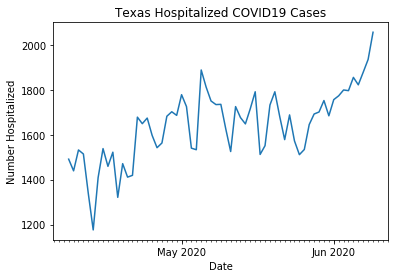

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Hospitalized',color='black')
plt.plot(c)
plt.title('Texas Hospitalized COVID19 Cases')
plt.savefig('Texas Hospitalized.png')

In [10]:
c

,Hospitalized
Date,
2020-04-08,1491
2020-04-09,1439
2020-04-10,1532
2020-04-11,1514
2020-04-12,1338
...,...
2020-06-05,1855
2020-06-06,1822
2020-06-07,1878
